In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from IPython.display import Image # show images

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#Image('/kaggle/input/parkinson/Header.jpg', width=1200)

<p style = "font-family:Book Antiqua;font-size:200%"><b>Importing libraries</b><p>

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from skrebate import ReliefF
from termcolor import colored
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_curve, auc





<p style = "font-family:Book Antiqua;font-size:200%"><b>Importing the dataset</b><p>

In [4]:
data=pd.read_csv("parkinsons.csv")

<p style = "font-family:Book Antiqua;font-size:150%"><b>Data Set Information:</b><p>
<p style = "font-family:Book Antiqua;font-size:150%">This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds to one of 195 voice recordings from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to the "status" column which is set to 0 for healthy and 1 for PD.<p>

<p style = "font-family:Book Antiqua;font-size:150%">Attribute Information :<p>

Matrix column entries (attributes):

name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%) , MDVP:Jitter(Abs) , MDVP:RAP , MDVP:PPQ , Jitter:DDP - Several measures of variation in fundamental frequency

MDVP:Shimmer , MDVP:Shimmer(dB) , Shimmer:APQ3 , Shimmer:APQ5 , MDVP:APQ , Shimmer:DDA - Several measures of variation in amplitude

NHR , HNR - Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE , D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1 , spread2 , PPE - Three nonlinear measures of fundamental frequency variation

In [5]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

<p style = "font-family:Book Antiqua;font-size:180%"> Check if there are NANs (missing values) in the dataset <p>

In [7]:
data.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

<p style = "font-family:Book Antiqua;font-size:140%">There are no NANs in the dataset<p>

In [8]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [9]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

<p style = "font-family:Book Antiqua;font-size:180%"> Checking if there are duplicated rows in the dataset<p>

In [10]:
data.duplicated().sum()

0

<p style = "font-family:Book Antiqua;font-size:140%">There are no duplicated rows in the dataset<p>

In [11]:
data["status"].value_counts()    

1    147
0     48
Name: status, dtype: int64

<p style = "font-family:Book Antiqua;font-size:150%">The Dataset is biased towards the (M)alignant category<p>

<p style = "font-family:Book Antiqua;font-size:250%"><b>Data Visualization</b><p>

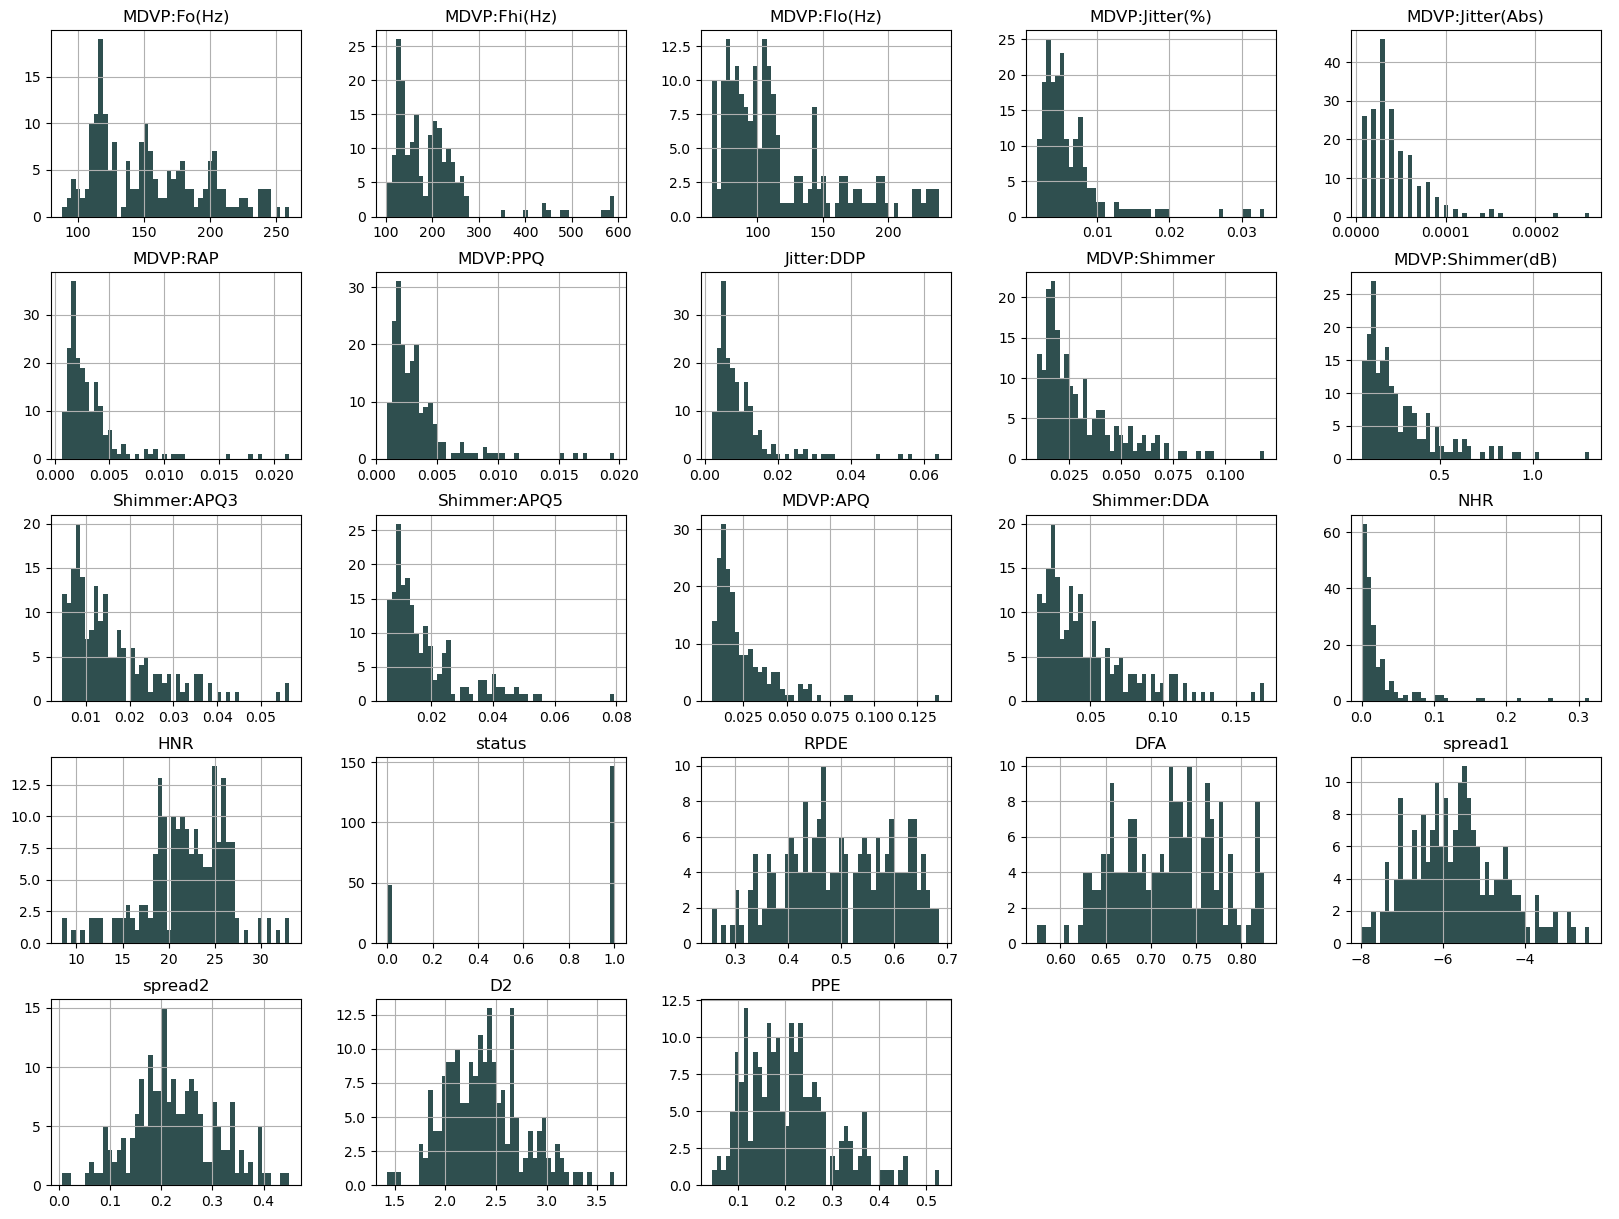

In [12]:
data.hist(bins=50, figsize =(20,15), color = 'darkslategrey')
plt.show(block=False)

<p style = "font-family:Book Antiqua;font-size:150%"><b>>> The input features are scaled before showing their boxplots.</b><p>

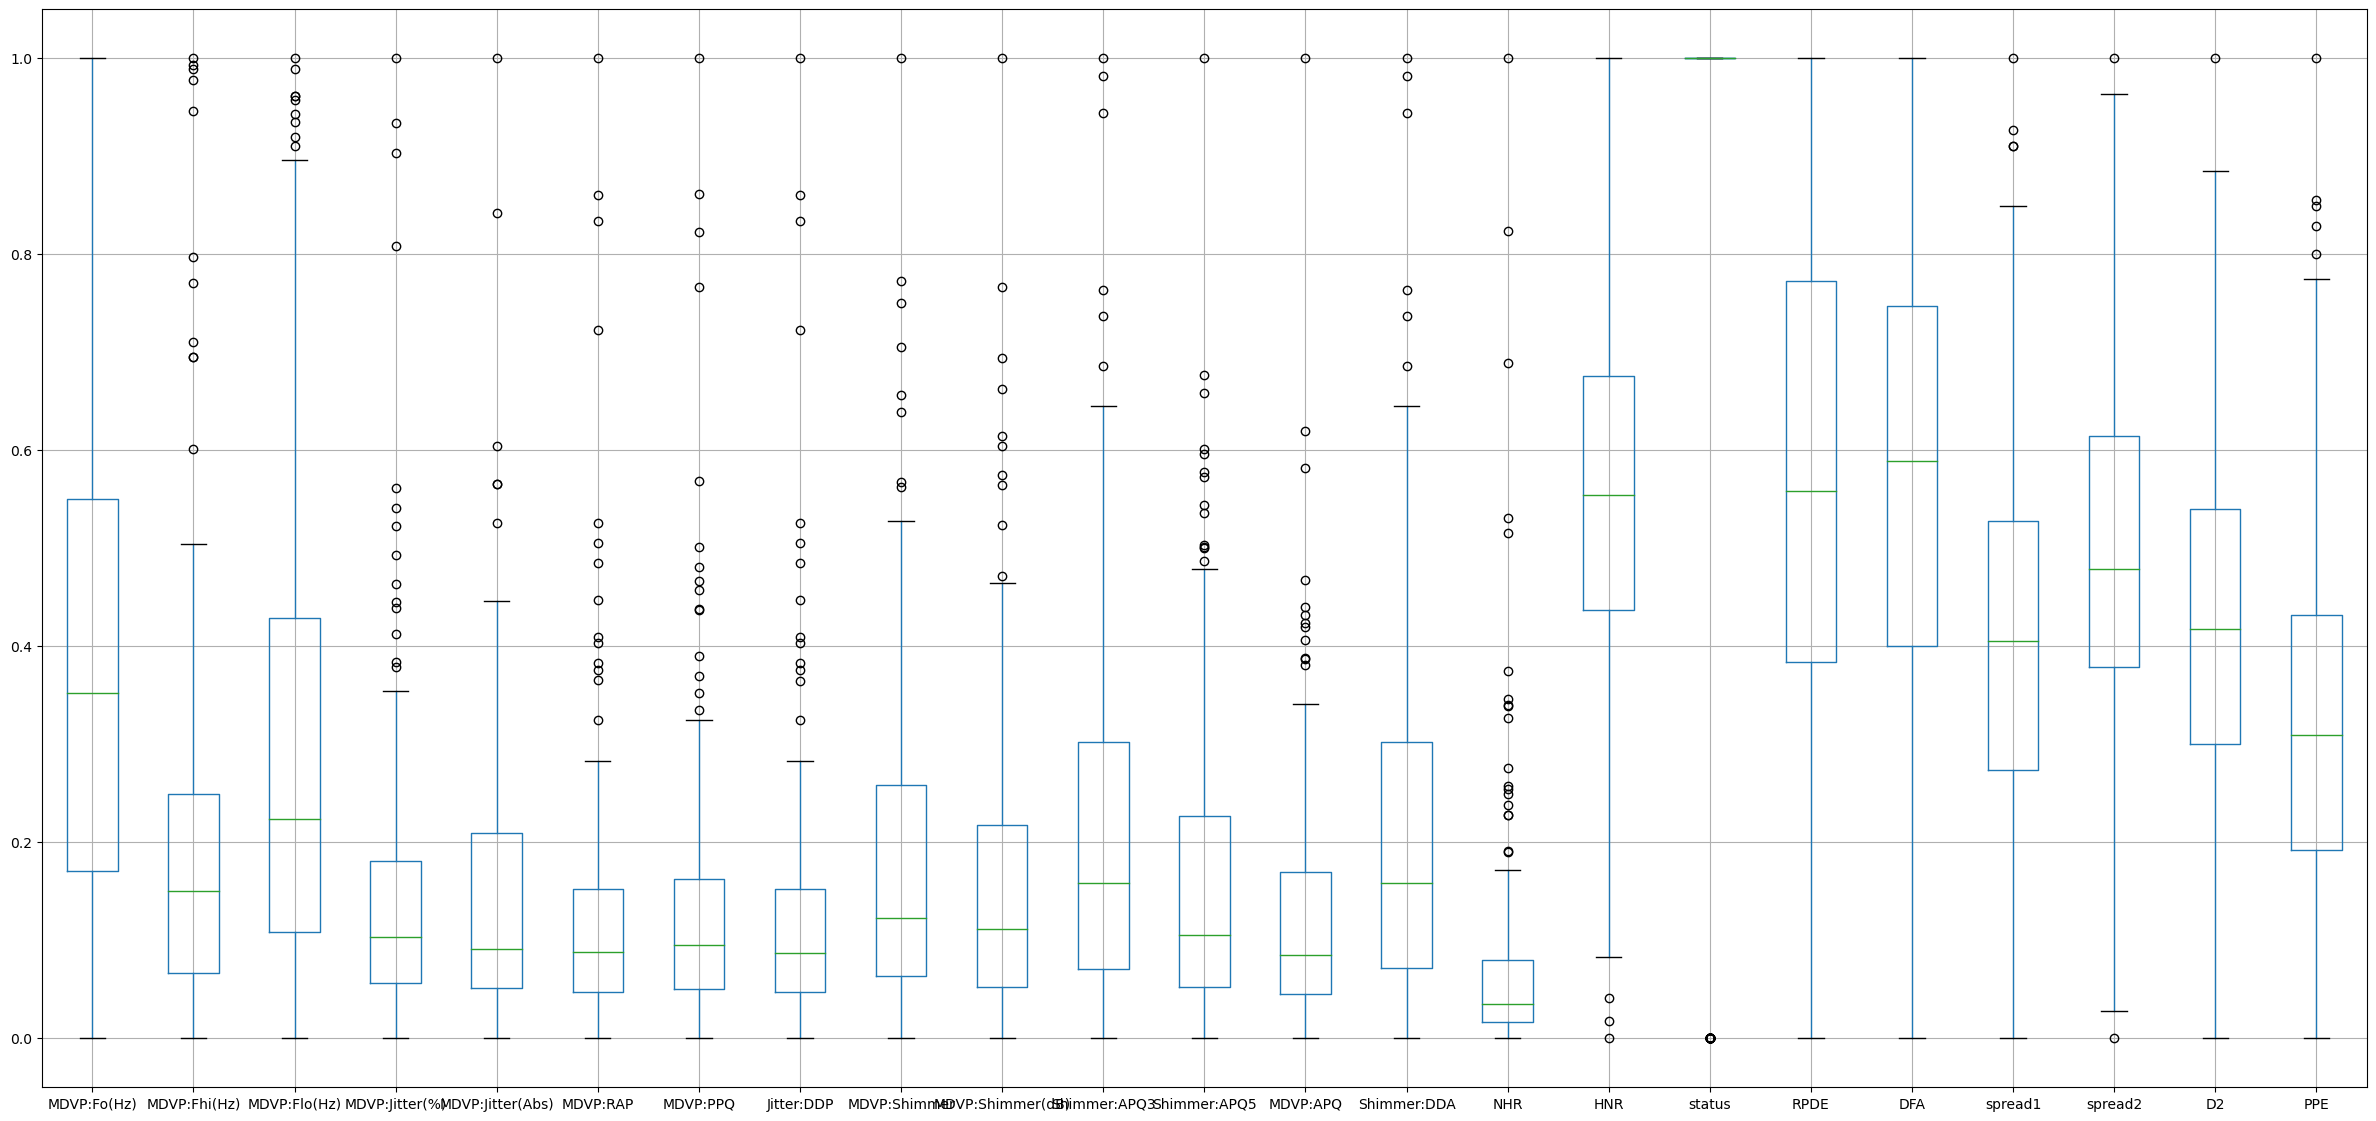

In [13]:
minmax = MinMaxScaler()
data_boxplot = data.drop(['name'],axis=1)
data_boxplot = minmax.fit_transform(data_boxplot)
boxplot = pd.DataFrame(data_boxplot, columns = data.drop(['name'],axis=1).columns)
boxplot.boxplot(figsize=(30,14))
plt.show(block=False)

<p style = "font-family:Book Antiqua;font-size:120%">- These points outside the whiskers are identified as outliers.<p>

<p style = "font-family:Book Antiqua;font-size:120%">- Outliers are data points that fall outside the interquartile range (IQR) of the data and are often considered as extreme values. While outliers are commonly viewed as anomalies or errors, they can also represent real-world variability and provide valuable insights into the data.<p>

<p style = "font-family:Book Antiqua;font-size:120%">- According to our case and dataset distribution, outliers represent rare events or extreme cases that are important to include in the analysis In finance, outliers provide important insights into the data and the underlying distribution.<p>

<hr>

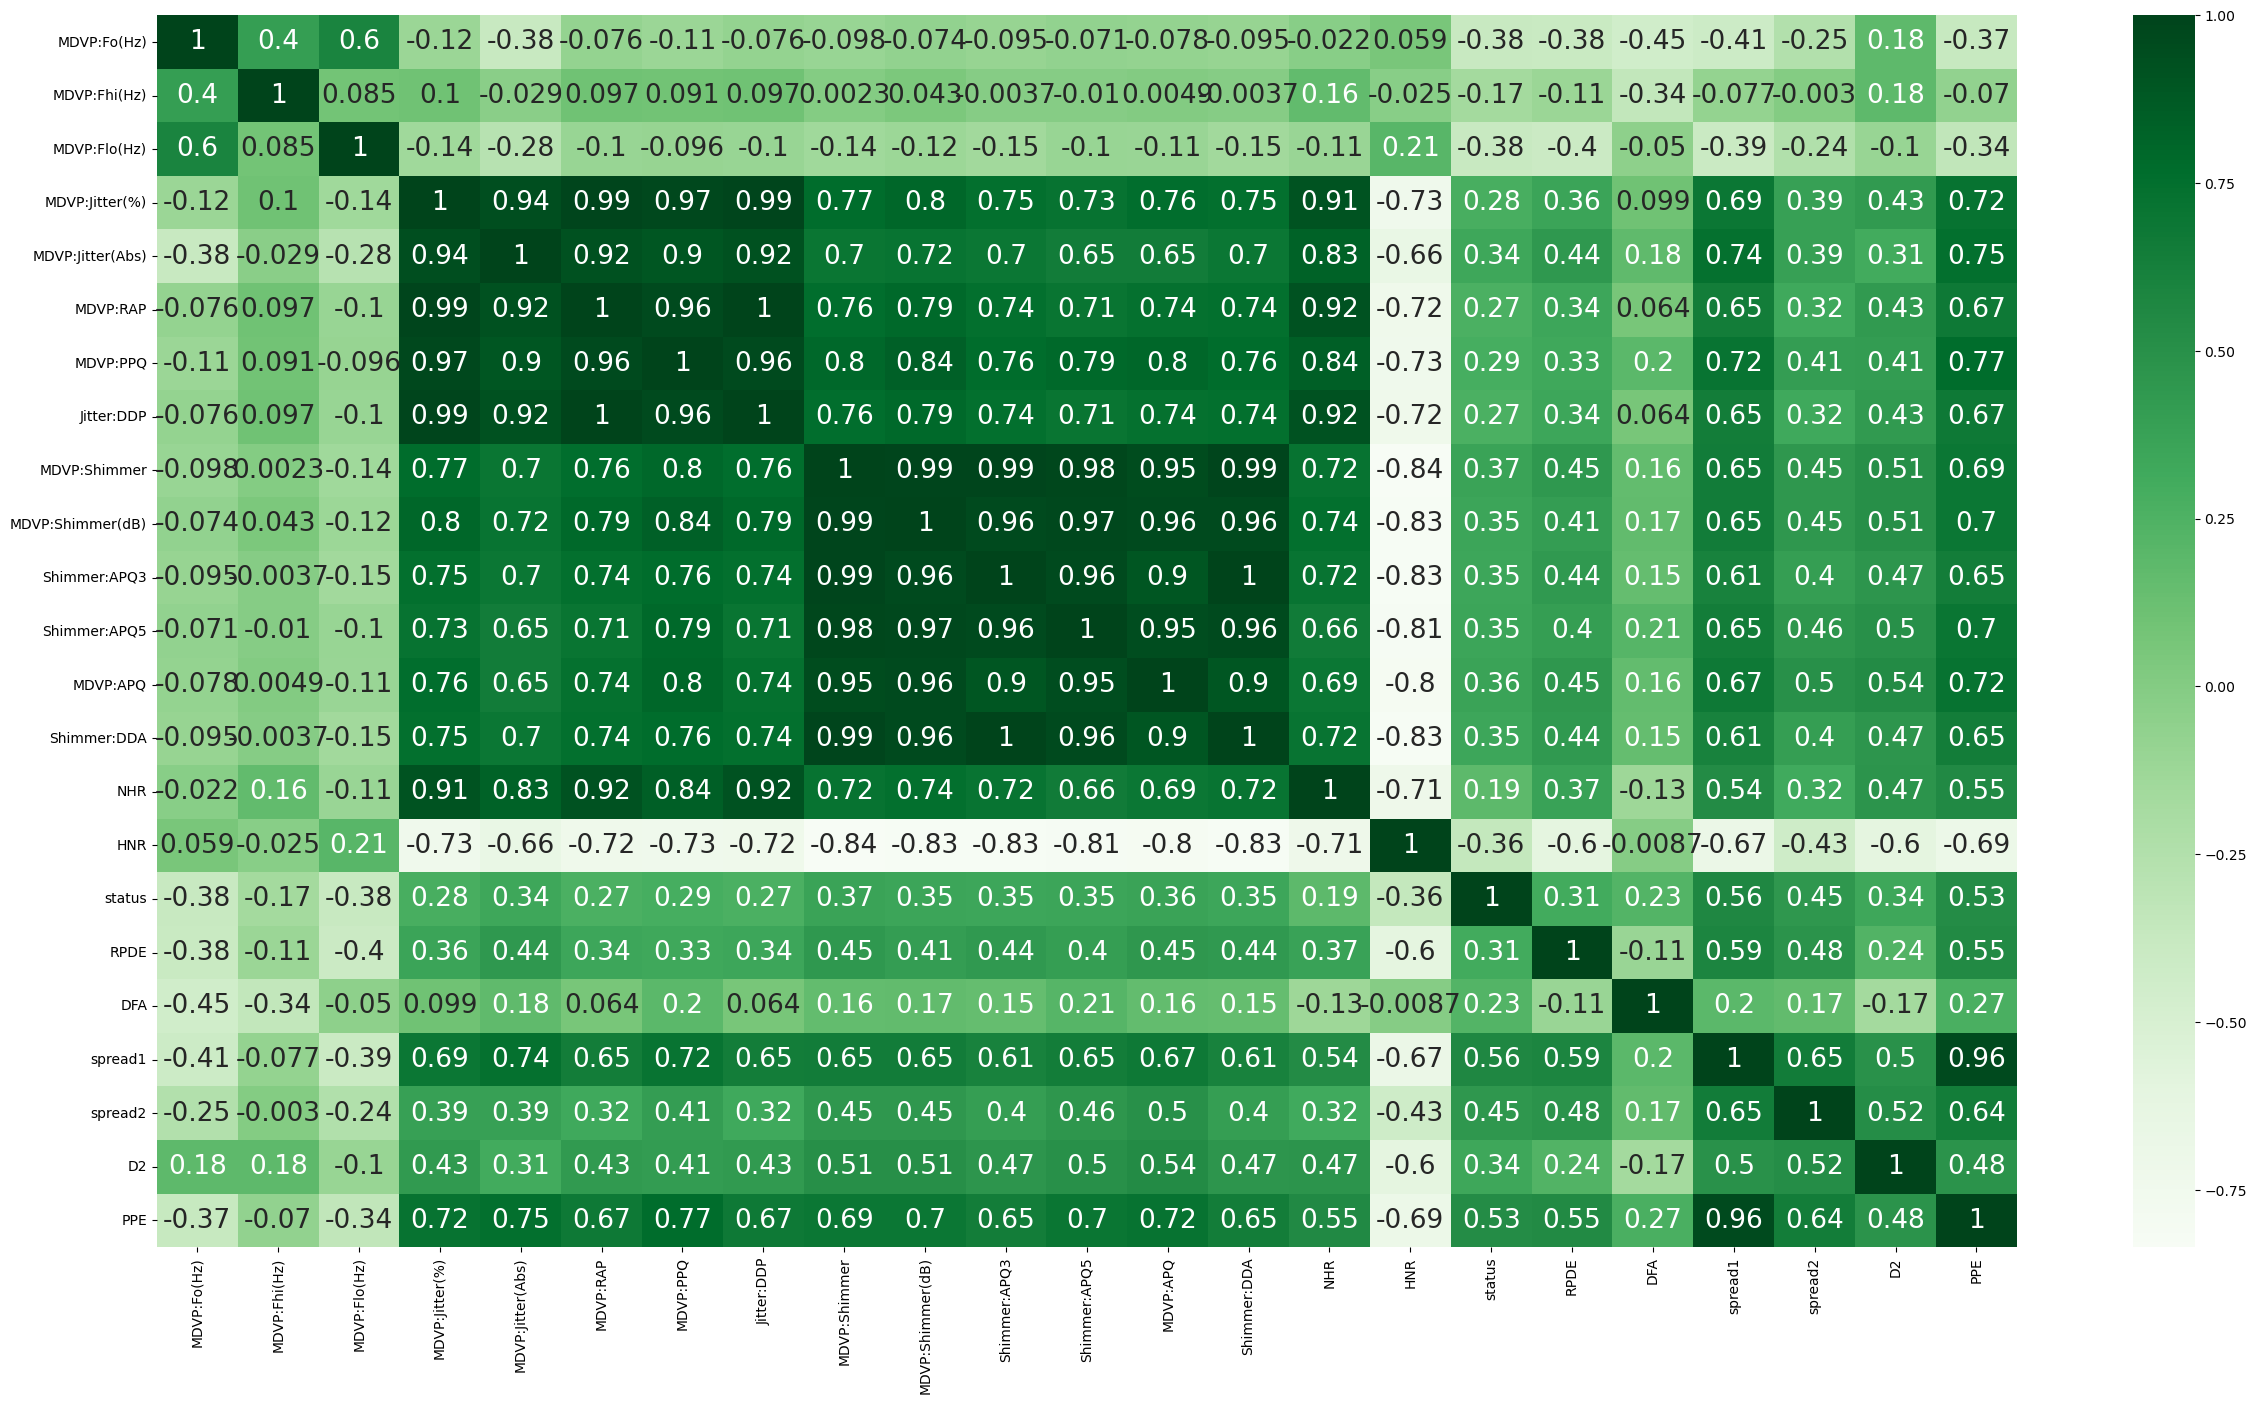

In [14]:
plt.figure(figsize=(30,16))
sns.heatmap(data.corr(), annot = True, cmap = 'Greens',annot_kws={'size':19})
plt.show()


<hr>

 <p style = "font-family:Book Antiqua;font-size:180%">-- Uncovering and Mitigating Bias in PD Class-Imbalanced Dataset<p>
    <p style = "font-family:Book Antiqua;font-size:140%"><b>3/4 of the instances given are parkinson's patients and the other 1/4 are benign</b><p>

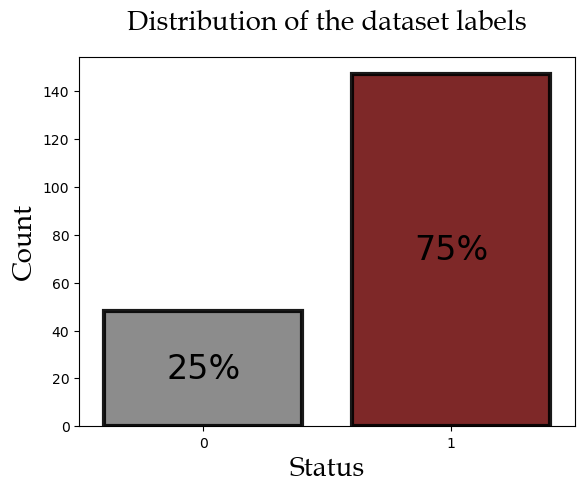

In [15]:
fig = sns.countplot(data= data, x='status', palette=['grey', 'maroon'], edgecolor='black', linewidth=3, alpha=0.9)

total = len(data['status'])

for p in fig.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() / 2
    fig.annotate(percentage, (x, y), ha='center', va='center', color='Black', fontsize=24)
    
fig.set_xlabel('Status', fontsize=20, fontfamily='Book Antiqua')
fig.set_ylabel('Count', fontsize=20, fontfamily='Book Antiqua')

plt.title('Distribution of the dataset labels',y = 1.05, fontsize=20, fontfamily='Book Antiqua')
plt.show()

<p style = "font-family:Book Antiqua;font-size:140%">* As shown in the above figure, The dataset appears to be unbalanced, with a significantly higher number of samples in Malignant category compared to the other.<p>

 <p style = "font-family:Book Antiqua;font-size:180%">To address the issue of class imbalance, a <b>over-sampling data balancing technique</b> will be used<p>
<p style = "font-family:Book Antiqua;font-size:240%"><b>- SMOTE oversampling technique</b>
<p style = "font-family:Book Antiqua;font-size:180%">The SMOTE Over Sampler technique is a oversampling used to address class imbalance, Oversampling involves increasing the number of samples in the minority class to match the number of samples in the majority class.<p>

<p style = "font-family:Book Antiqua;font-size:180%"> ---> Firstly before applying the over-sampling technique, the models will be trained and evaluated on the imbalanced PD dataset<p>

<hr>

 <p style = "font-family:Book Antiqua;font-size:300%"><b> Data Preprocessing</b><p>
  <p style = "font-family:Book Antiqua;font-size:200%"><b>Feature Engineering</b><p>

<p style = "font-family:Book Antiqua;font-size:180%">- X will refer to our input features.<br>- y will refer to the target feature[status].<p>

<p style = "font-family:Book Antiqua;font-size:180%">- Without balancing the dataset<p>

In [16]:
X=data.drop(['name','status'],axis=1)
y=data["status"]

<p style = "font-family:Book Antiqua;font-size:180%"> - Balancing the dataset<p>

In [17]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
smote_data = pd.concat([X_smote, y_smote], axis=1)
smote_data.shape

(294, 23)

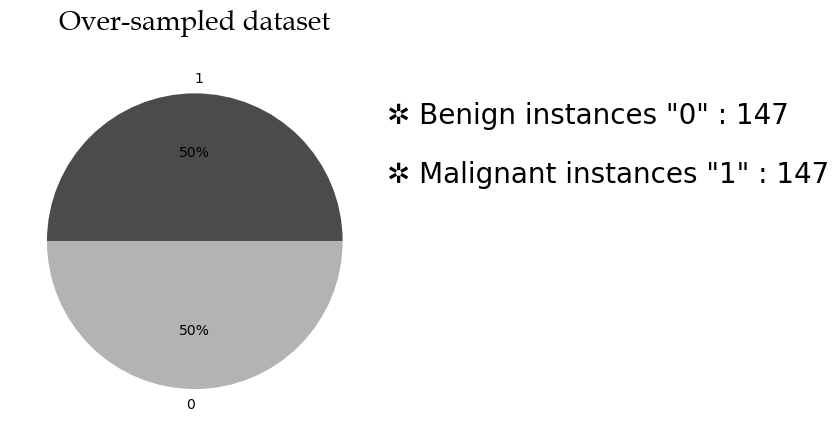

In [18]:
num_status=smote_data['status'].value_counts()
over_counts = num_status.values
plt.pie(num_status, labels=num_status.index.values, colors=[ (0.29296875,0.29296875,0.29296875), (0.703125,0.703125,0.703125)]
        , autopct='%d%%')
plt.title('Over-sampled dataset', y=1.05, fontsize=20, fontfamily='Book Antiqua')
plt.text(x=1.3, y=0.8, s=f'✲ Benign instances "0" : {len(smote_data[smote_data.status==0].value_counts())}', fontsize=20)
plt.text(x=1.3, y=0.4, s=f'✲ Malignant instances "1" : {len(smote_data[smote_data.status==1].value_counts())}', fontsize=20)
plt.show(block=False)

In [19]:
(data['status']==1).sum()

147

<p style = "font-family:Book Antiqua;font-size:180%"> Splitting the data into Training and Testing samples<br><br>-- Without balancing the data : <p>

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy() 


In [22]:
relief = ReliefF(n_neighbors=10, n_features_to_select=13)

In [23]:
X_train_relief = relief.fit_transform(X_train, y_train)

In [24]:
X_test_relief = relief.transform(X_test)

<p style = "font-family:Book Antiqua;font-size:180%"> -- Applying SMOTE Oversampling Technique :<p>

In [25]:
#X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote, y_smote,
                                                                            #train_size=0.8, random_state=42)

<p style = "font-family:Book Antiqua;font-size:240%"><b> Normalization</b><p>

# $ MinMax(X) = \frac{x_{i} -  x_{min}} {x_{max} -  x_{min}}\ $
<p style = "font-family:Book Antiqua;font-size:120%">where X is a particular feature represented by a column in
the dataset, xi is a value of this column where i is the number
of elements in the column. The minimum value of the
column is represented as Xmin and the maximum value of the
column is $X_{max}$.<p>

<p style = "font-family:Book Antiqua;font-size:180%"> -- Normalizing the unbalanced data<p>

In [26]:
#X_train_scaled = minmax.fit_transform(X_train)
#X_test_scaled = minmax.transform(X_test)

<p style = "font-family:Book Antiqua;font-size:180%"> -- Normalizing the oversampled data<p>

In [27]:
#X_smote_train_scaled = minmax.fit_transform(X_smote_train)
#X_smote_test_scaled = minmax.transform(X_smote_test)

In [28]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler()
print("The number of classes before fit {}".format(Counter(y_train)))
X_train_relief,y_train=os.fit_resample(X_train_relief,y_train)
print("The number of classes after fit {}".format(Counter(y_train)))


The number of classes before fit Counter({1: 115, 0: 41})
The number of classes after fit Counter({1: 115, 0: 115})


<p style = "font-family:Book Antiqua;font-size:300%"><b> Model Selection</b></p>
<p style = "font-family:Book Antiqua;font-size:150%"> Function to evaluate the performance of models</p>

In [29]:
def Evaluate_Performance(Model, Xtrain, Xtest, Ytrain, Ytest) : 
    Model.fit(Xtrain,Ytrain)
    overall_score = cross_val_score(Model, Xtrain,Ytrain, cv=10)
    model_score = np.average(overall_score)
    Ypredicted = Model.predict(Xtest)
    print("\n • Training Accuracy Score : ", round(Model.score(Xtrain, Ytrain) * 100,2))
    print(f" • Cross Validation Score : {round(model_score * 100,2)}")
    print(colored(" ❖ Testing Accuracy Score : ", attrs=['bold']),
          colored(f"{round(accuracy_score(Ytest, Ypredicted) * 100,2)}", color='black', attrs=['bold']))
    print(' • Precision Score is :', round(precision_score(Ytest, Ypredicted) * 100,2))
    print(' • Recall Score is :', round(recall_score(Ytest, Ypredicted) * 100,2))
    print(' • F1-Score Score is :', round(f1_score(Ytest, Ypredicted) * 100,2))
    print('-'*80)
    conf_matrix = confusion_matrix(Ytest,Ypredicted)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, annot_kws={"size": 16})
    plt.title('Predicted Labels',y = 1.05, fontsize=20, fontfamily='Times New Roman')
    plt.ylabel('True Labels', labelpad=25, fontsize=20, fontfamily='Times New Roman')
    plt.show()
    print('-'*80)

<span style = "font-family:Book Antiqua;font-size:250%"><b> ✲ 1st Scenario :</b></span> <span style = "font-family:Book Antiqua;font-size:180%">where the models will be trained and evaluated on the unbalanced dataset.</span>


<p style = "font-family:Book Antiqua;font-size:180%"> [1] Logistic Regression :<p>

In [30]:
LR = LogisticRegression()
LR.fit(X_train_scaled,y_train)
y_pred_LR = LR.predict(X_test_scaled)
print('-'*80)
print("Logistic Regression :")
print("-"*16)
Evaluate_Performance(LR, X_train_scaled, X_test_scaled, y_train, y_test)

NameError: name 'X_train_scaled' is not defined

<p style = "font-family:Book Antiqua;font-size:180%"> [2] Support Vector Machine :<p>

In [31]:

clf = SVC(kernel='linear', C=1.0, random_state=42)
clf.fit(X_train_relief, y_train)
y_pred = clf.predict(X_test_relief)
#SVM = SVC(kernel = 'linear',C=1.0, random_state=42)
#SVM.fit(X_train_relief,y_train)

#y_pred = SVM.predict(X_test_relief)
#y_pred_SVM = SVM.predict(X_test_scaled)
print('-'*80)
print("Support Vector Machine:")
print("-"*16)
Evaluate_Performance(SVM,X_train_relief, X_test_relief, y_train, y_test)

#accuracy = accuracy_score(y_test, y_pred)

#print(f"Accuracy with ReliefF feature selection and SVM: {accuracy * 100:.2f}%")

--------------------------------------------------------------------------------
Support Vector Machine:
----------------


NameError: name 'SVM' is not defined

In [36]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train_relief, y_train)
pred_test = svm.predict(X_test_relief)
pred_train=svm.predict(X_train_relief)
accuracy_test= accuracy_score(y_test, pred_test)
accuracy_train=accuracy_score(y_train,pred_train)
print("Train accuracy: ",accuracy_train*100)
print('----------------------------------')
print("Test accuracy: ",accuracy_test*100)
print('----------------------------------')

Train accuracy:  82.6086956521739
----------------------------------
Test accuracy:  87.17948717948718
----------------------------------


In [33]:
svm = SVC(random_state=42)


<p style = "font-family:Book Antiqua;font-size:180%"> [3] Decision Tree :<p>

--------------------------------------------------------------------------------
Decision Tree Classifier :
----------------

 • Training Accuracy Score :  100.0
 • Cross Validation Score : 87.21
 ❖ Testing Accuracy Score :  89.74
 • Precision Score is : 91.18
 • Recall Score is : 96.88
 • F1-Score Score is : 93.94
--------------------------------------------------------------------------------


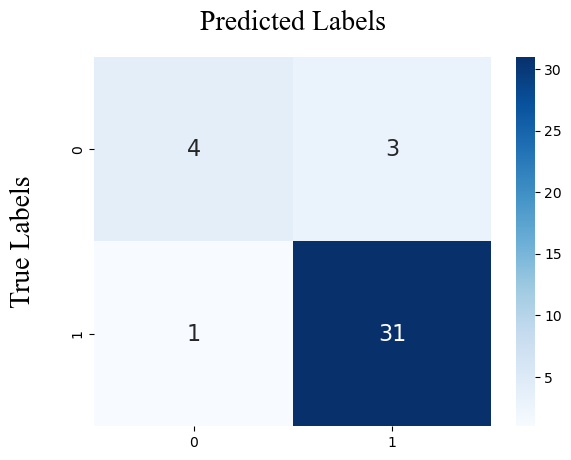

--------------------------------------------------------------------------------


DECISION TREE :


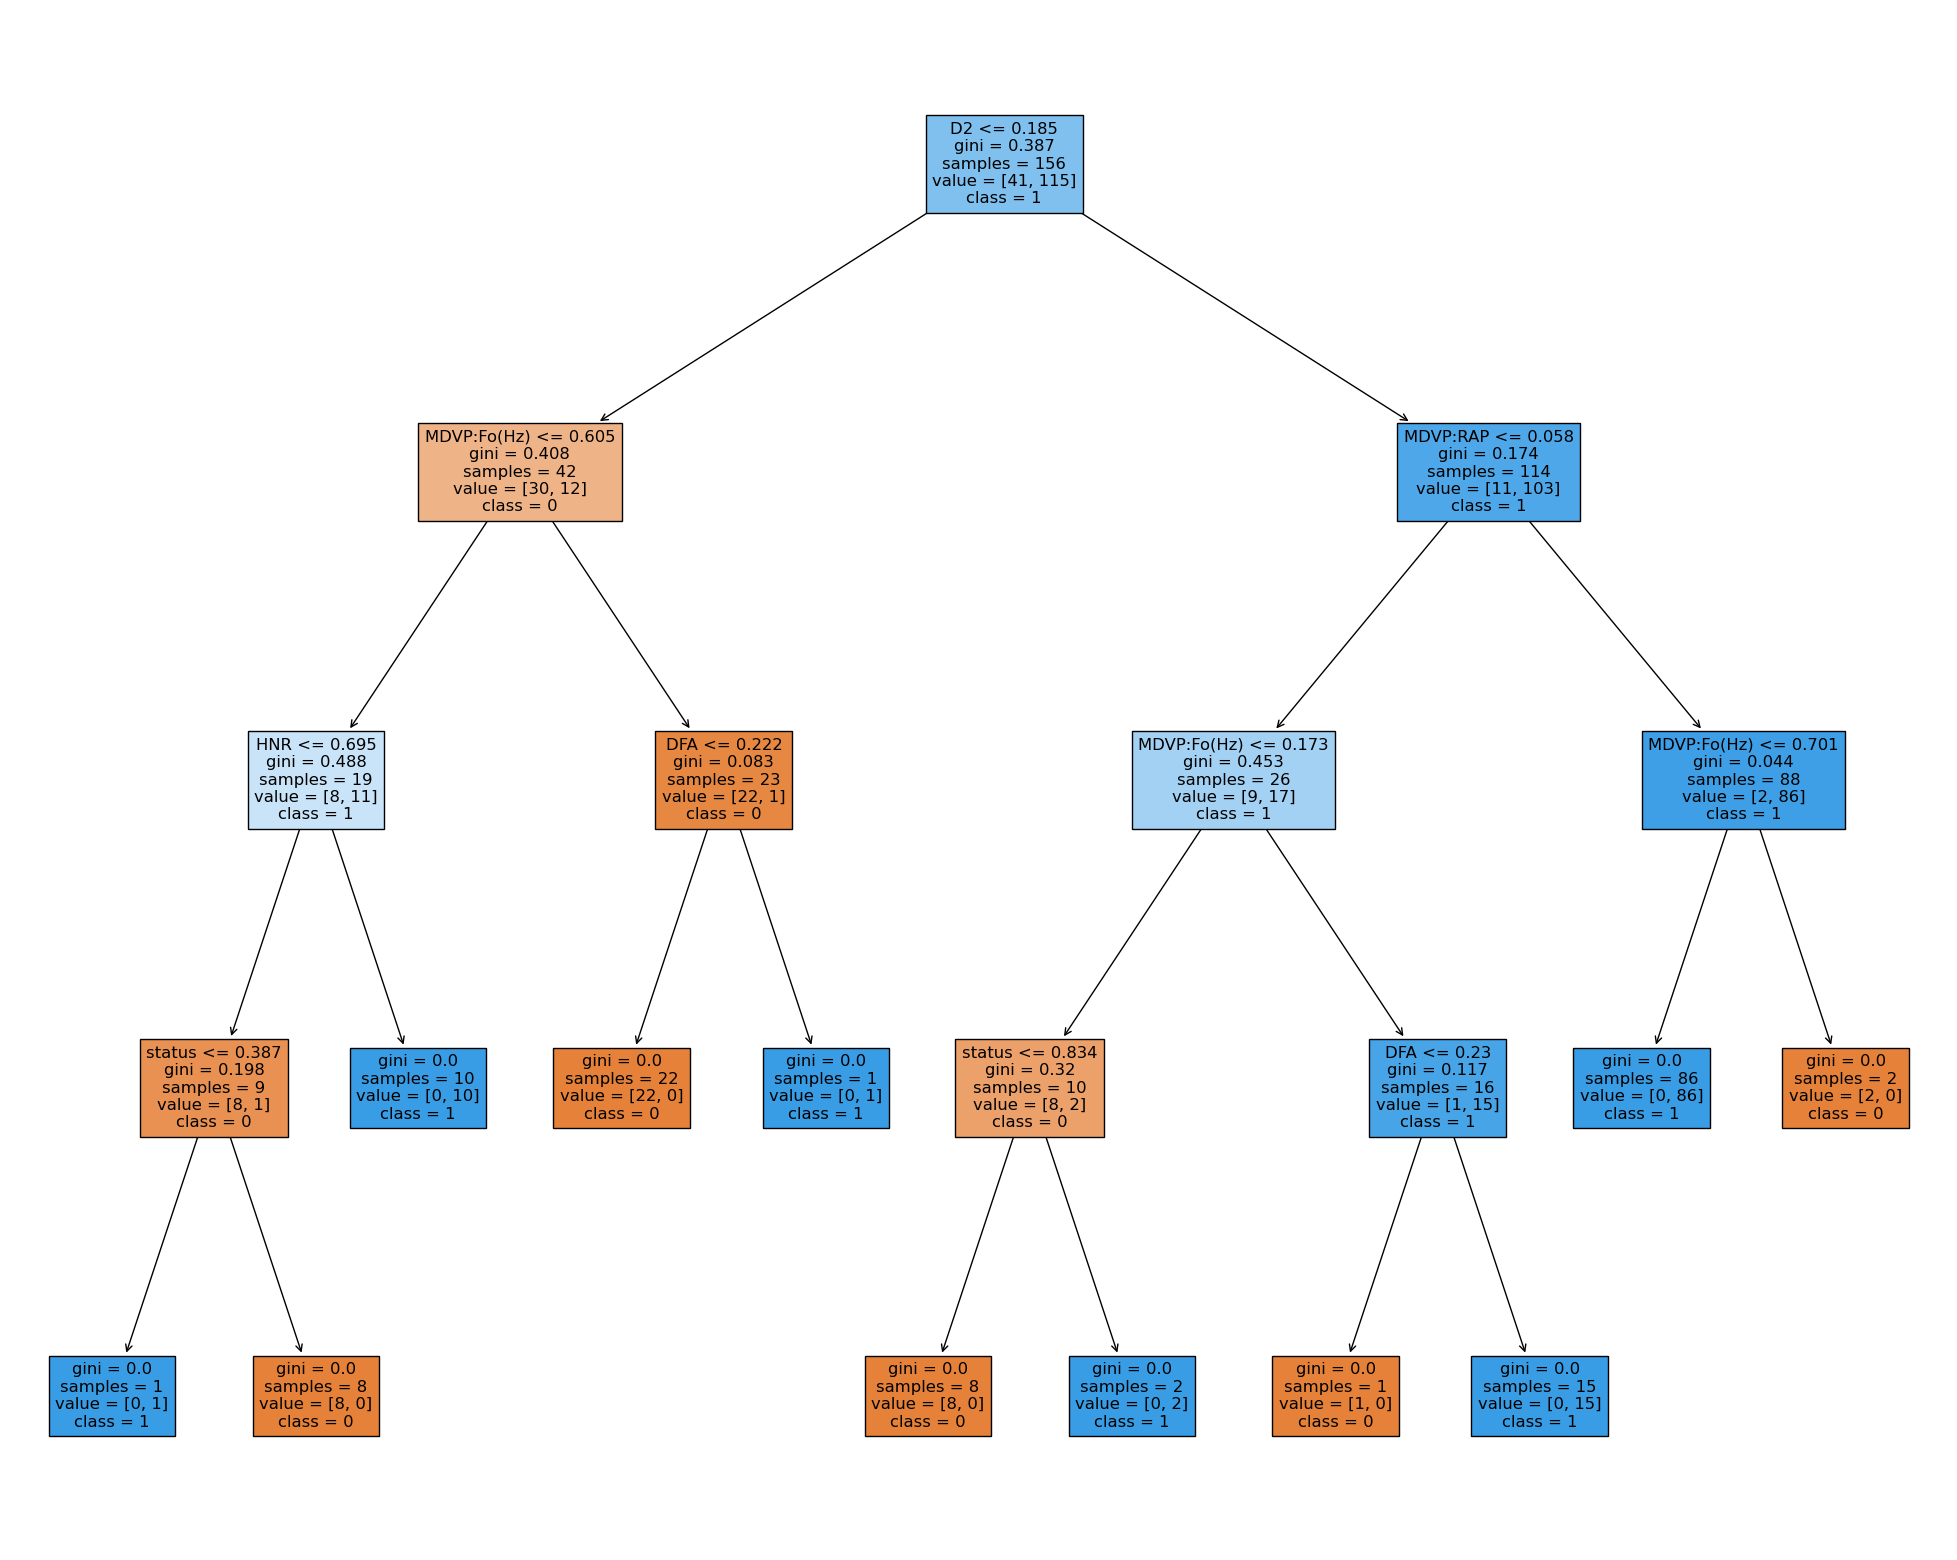

In [33]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train_scaled, y_train)
y_pred_DTC = DTC.predict(X_test_scaled)
print('-'*80)
print('Decision Tree Classifier :')
print("-"*16)
Evaluate_Performance(DTC, X_train_scaled, X_test_scaled, y_train, y_test)
print('\n')
print("DECISION TREE :")
fig = plt.figure(figsize=(25,20))
tree = plot_tree(DTC, feature_names = [ c for c in data.drop(['name'],axis=1).columns], class_names=['0','1'], filled=True)

<p style = "font-family:Book Antiqua;font-size:180%"> [4] Random Forest Classifier :<p>

--------------------------------------------------------------------------------
Random Forest Classifier
----------------

 • Training Accuracy Score :  100.0
 • Cross Validation Score : 90.92
 ❖ Testing Accuracy Score :  94.87
 • Precision Score is : 94.12
 • Recall Score is : 100.0
 • F1-Score Score is : 96.97
--------------------------------------------------------------------------------


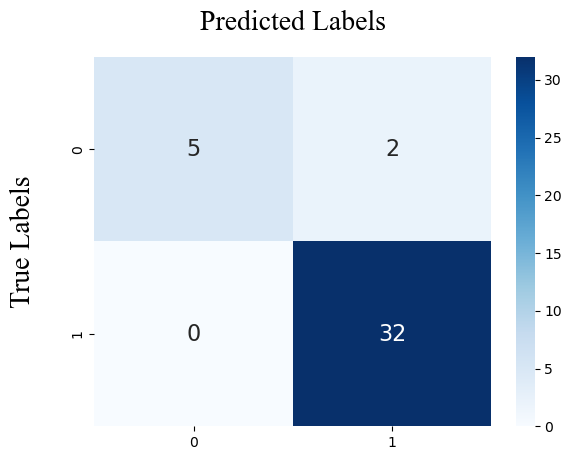

--------------------------------------------------------------------------------


In [34]:
RFC=RandomForestClassifier(n_estimators=150)
RFC.fit(X_train_scaled, y_train)
y_pred_RFC = RFC.predict(X_test_scaled)
print('-'*80)
print('Random Forest Classifier')
print("-"*16)
Evaluate_Performance(RFC, X_train_scaled, X_test_scaled, y_train, y_test)

<p style = "font-family:Book Antiqua;font-size:180%"> [5] Key- Nearest Neighbor :<p>

--------------------------------------------------------------------------------
Key- Nearest Neighbor :
----------------

 • Training Accuracy Score :  96.79
 • Cross Validation Score : 89.79
 ❖ Testing Accuracy Score :  94.87
 • Precision Score is : 94.12
 • Recall Score is : 100.0
 • F1-Score Score is : 96.97
--------------------------------------------------------------------------------


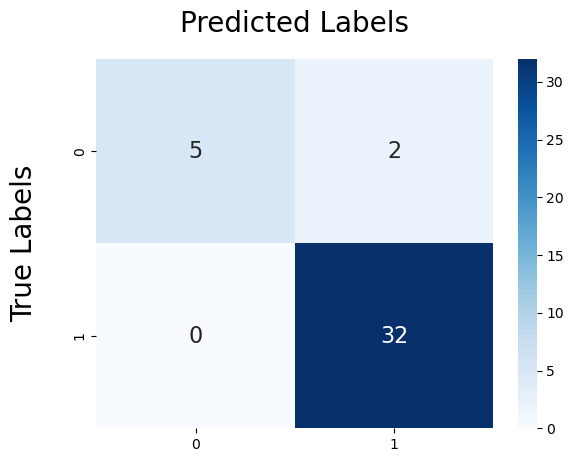

--------------------------------------------------------------------------------


In [28]:
KNN = KNeighborsClassifier()
KNN.fit(X_train_scaled, y_train)
y_pred_KNN = KNN.predict(X_test_scaled)
print('-'*80)
print("Key- Nearest Neighbor :")
print("-"*16)
Evaluate_Performance(KNN, X_train_scaled, X_test_scaled, y_train, y_test)

<p style = "font-family:Book Antiqua;font-size:300%"><b> Results  </b><p>

In [29]:
first_scenario_results = [
    {'Model': 'Logistic Regression', 'Precision': precision_score(y_test, y_pred_LR) , 'Recall': recall_score(y_test, y_pred_LR) ,
     'F1-Score': f1_score(y_test, y_pred_LR) , 'Accuracy': accuracy_score(y_test, y_pred_LR)},
    
    {'Model': 'Support Vector Machine(linear)', 'Precision': precision_score(y_test, y_pred_SVM), 'Recall': recall_score(y_test, y_pred_SVM),
     'F1-Score': f1_score(y_test, y_pred_SVM), 'Accuracy': accuracy_score(y_test, y_pred_SVM)},
    
    {'Model': 'Decision Tree', 'Precision': precision_score(y_test, y_pred_DTC), 'Recall': recall_score(y_test, y_pred_DTC),
     'F1-Score': f1_score(y_test, y_pred_DTC), 'Accuracy': accuracy_score(y_test, y_pred_DTC)},
    
    {'Model': 'Random Forest', 'Precision': precision_score(y_test, y_pred_RFC), 'Recall': recall_score(y_test, y_pred_RFC),
     'F1-Score': f1_score(y_test, y_pred_RFC), 'Accuracy': accuracy_score(y_test, y_pred_RFC)}, 

    {'Model': 'K-Nearest Neighbor', 'Precision': precision_score(y_test, y_pred_KNN), 'Recall': recall_score(y_test, y_pred_KNN),
     'F1-Score': f1_score(y_test, y_pred_KNN), 'Accuracy': accuracy_score(y_test, y_pred_KNN)},
    
]
first_scenario_results = pd.DataFrame(first_scenario_results).style.set_properties(**{'font-weight': 'bold'}, subset=pd.IndexSlice[[3,4], :])
print("Results without balancing the dataset : ")
print('-'*70)
first_scenario_results

Results without balancing the dataset : 
----------------------------------------------------------------------


,Model,Precision,Recall,F1-Score,Accuracy
0,Logistic Regression,0.888889,1.000000,0.941176,0.897436
1,Support Vector Machine(linear),0.888889,1.000000,0.941176,0.897436
2,Decision Tree,0.937500,0.937500,0.937500,0.897436
3,Random Forest,0.941176,1.000000,0.969697,0.948718
4,K-Nearest Neighbor,0.941176,1.000000,0.969697,0.948718


<p style = "font-family:Book Antiqua;font-size:160%"> K-Nearest Neighbor calssifier have the potential to achieve higher performance<p> <hr>

<span style = "font-family:Book Antiqua;font-size:250%"><b> ✲ 2nd Scenario :</b></span> <span style = "font-family:Book Antiqua;font-size:180%">where the models will be trained and evaluated on the oversampled dataset.</span>

<p style = "font-family:Book Antiqua;font-size:180%"> [1] Logistic Regression :<p>

--------------------------------------------------------------------------------
Logistic Regression :
----------------

 • Training Accuracy Score :  80.0
 • Cross Validation Score : 77.46
 ❖ Testing Accuracy Score :  84.75
 • Precision Score is : 85.71
 • Recall Score is : 82.76
 • F1-Score Score is : 84.21
--------------------------------------------------------------------------------


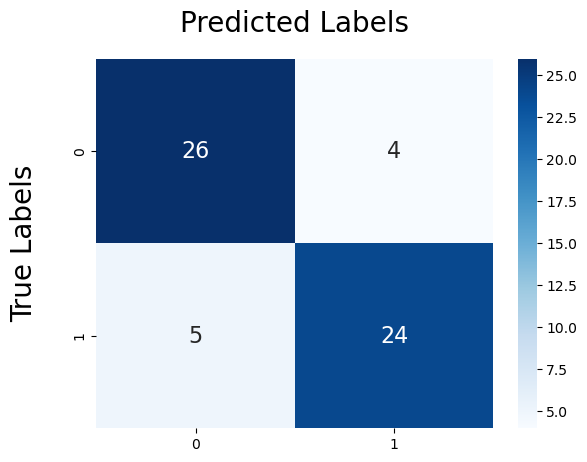

--------------------------------------------------------------------------------


In [30]:
LR.fit(X_smote_train_scaled,y_smote_train)
y_pred_LR_smote = LR.predict(X_smote_test_scaled)
print('-'*80)
print("Logistic Regression :")
print("-"*16)
Evaluate_Performance(LR, X_smote_train_scaled, X_smote_test_scaled, y_smote_train, y_smote_test)

<p style = "font-family:Book Antiqua;font-size:180%"> [2] Support Vector Machine :<p>

--------------------------------------------------------------------------------
Support vector machine :
----------------

 • Training Accuracy Score :  83.4
 • Cross Validation Score : 79.22
 ❖ Testing Accuracy Score :  88.14
 • Precision Score is : 89.29
 • Recall Score is : 86.21
 • F1-Score Score is : 87.72
--------------------------------------------------------------------------------


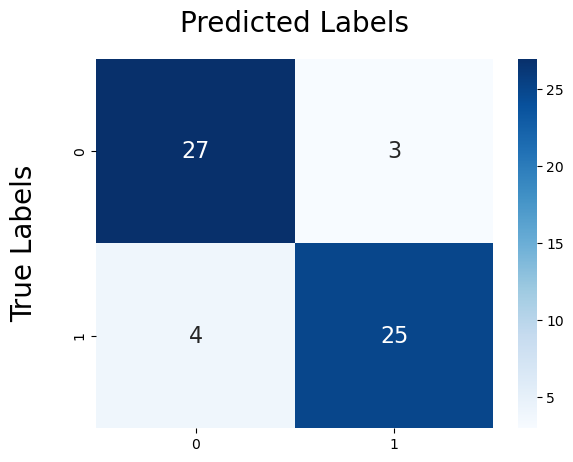

--------------------------------------------------------------------------------


In [31]:
SVM.fit(X_smote_train_scaled,y_smote_train)
y_pred_SVM_smote = SVM.predict(X_smote_test_scaled)
print('-'*80)
print("Support vector machine :")
print("-"*16)
Evaluate_Performance(SVM, X_smote_train_scaled, X_smote_test_scaled, y_smote_train, y_smote_test)

<p style = "font-family:Book Antiqua;font-size:180%"> [3] Decision Tree :<p>

--------------------------------------------------------------------------------
Decision Tree Classifier :
----------------

 • Training Accuracy Score :  100.0
 • Cross Validation Score : 88.5
 ❖ Testing Accuracy Score :  96.61
 • Precision Score is : 93.55
 • Recall Score is : 100.0
 • F1-Score Score is : 96.67
--------------------------------------------------------------------------------


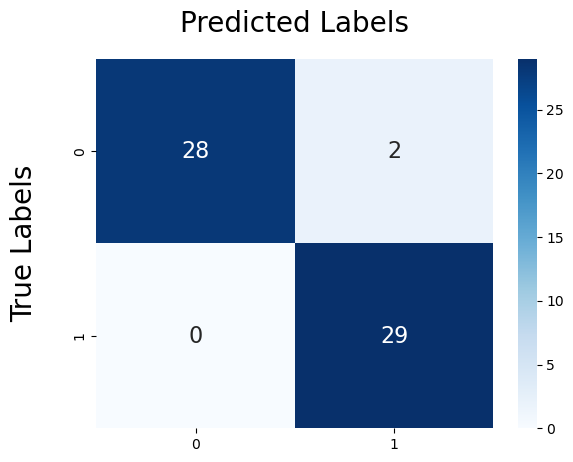

--------------------------------------------------------------------------------
--> Tree's Depth :  6 

DECISION TREE :


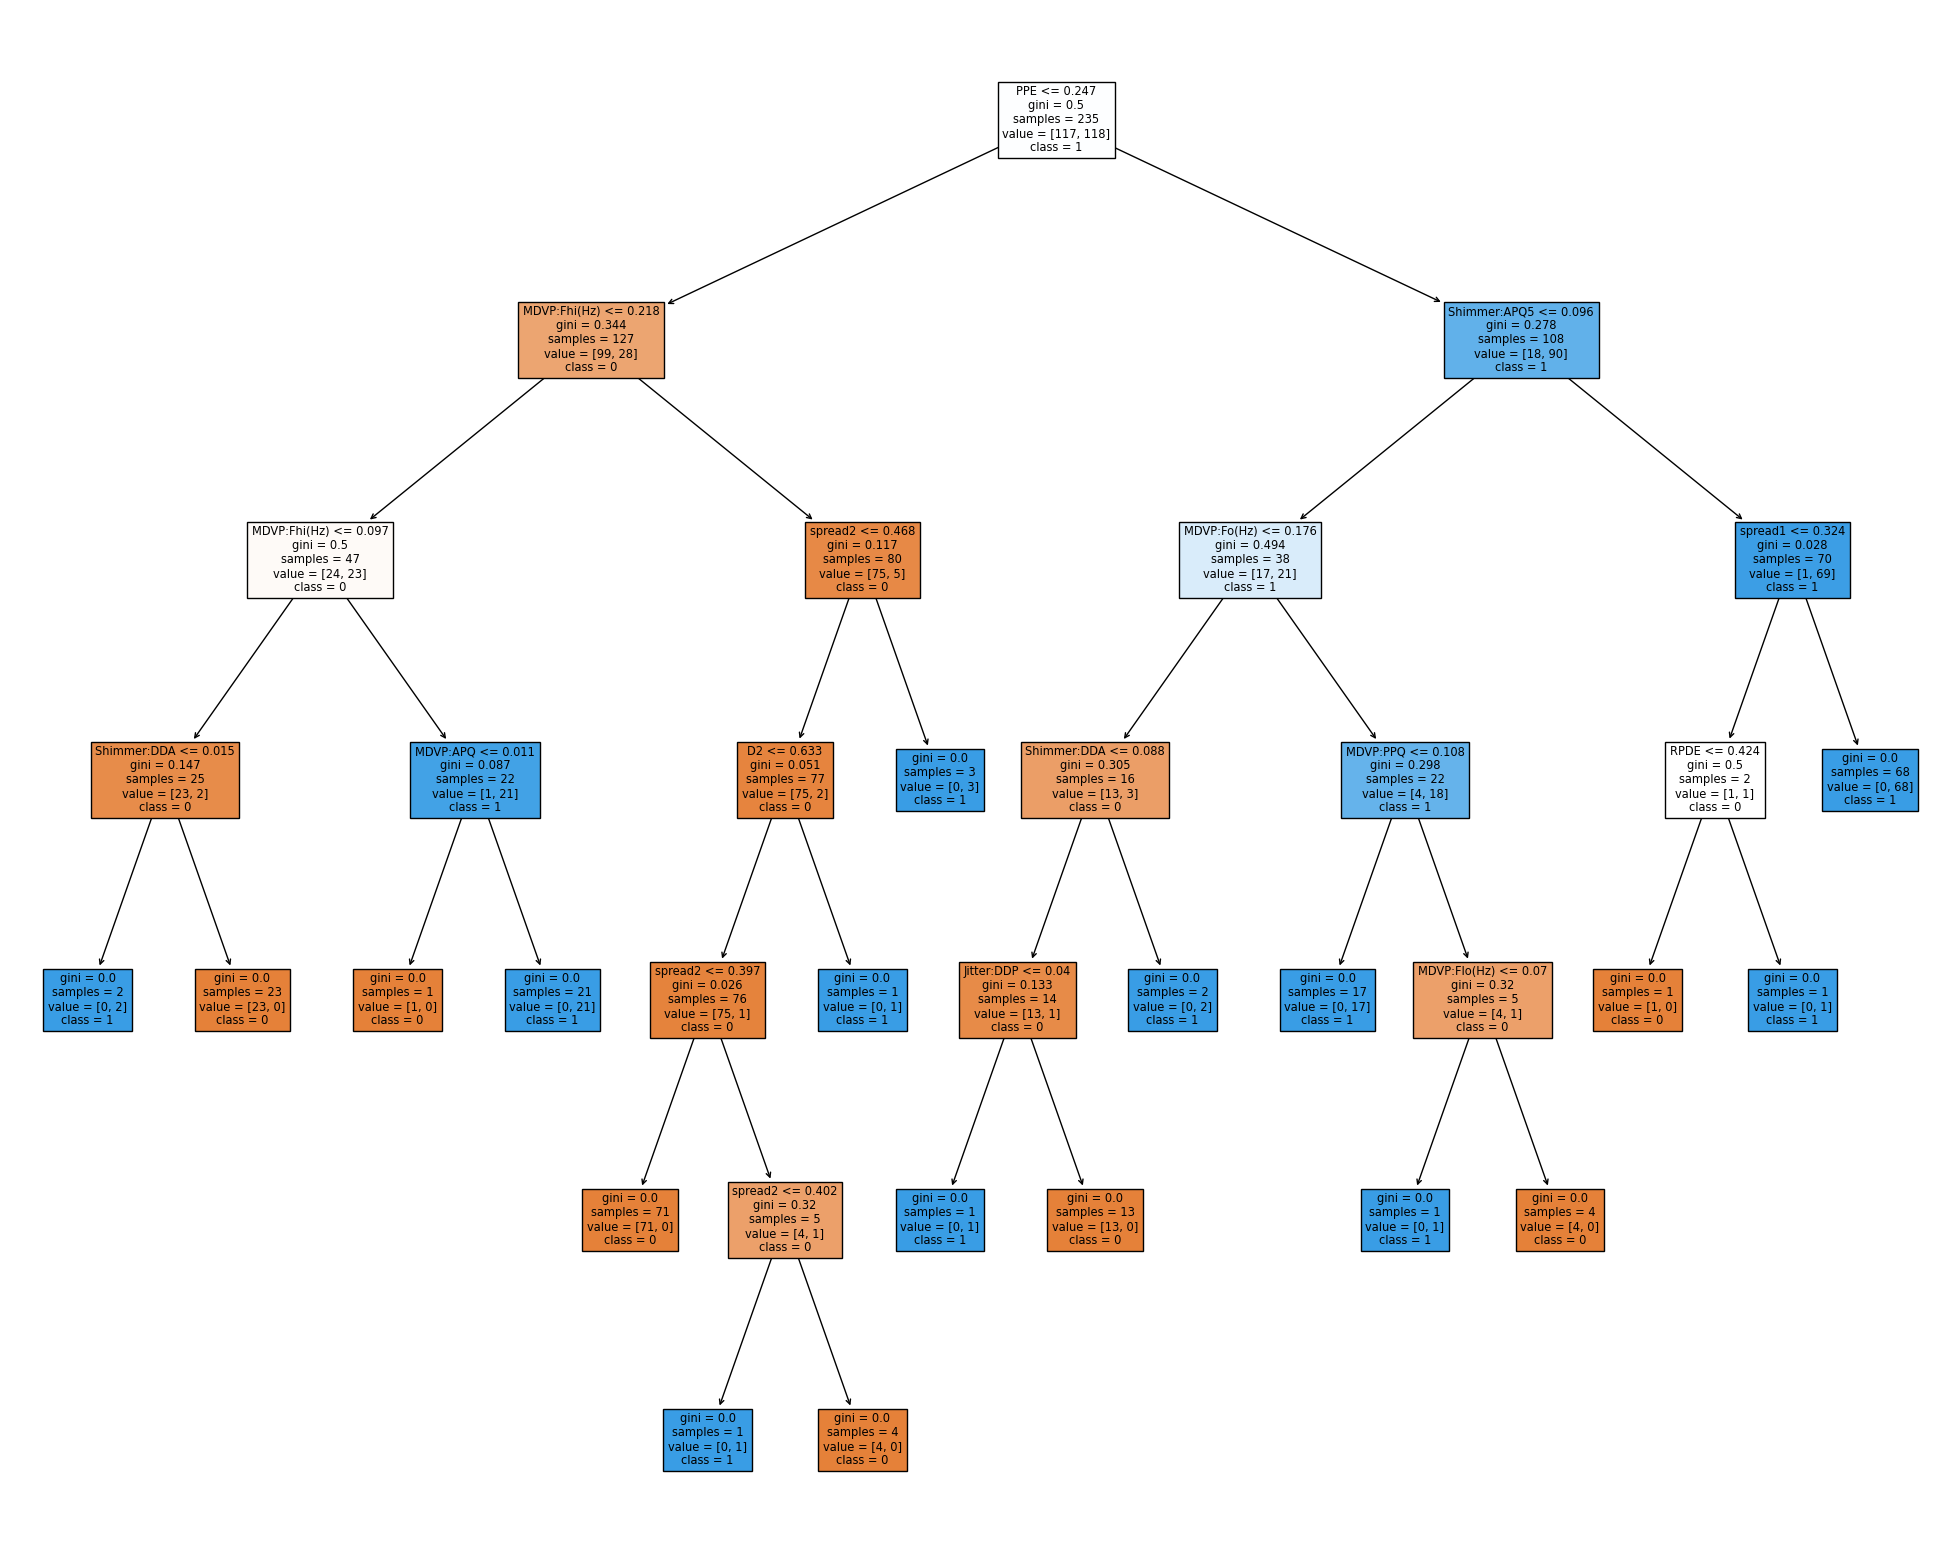

In [32]:
DTC = DecisionTreeClassifier()
DTC.fit(X_smote_train_scaled,y_smote_train)
y_pred_DTC_smote = DTC.predict(X_smote_test_scaled)
print('-'*80)
print("Decision Tree Classifier :")
print("-"*16)
Evaluate_Performance(DTC, X_smote_train_scaled, X_smote_test_scaled, y_smote_train, y_smote_test)
print( '--> Tree\'s Depth : ',DTC.tree_.max_depth,'\n')
print("DECISION TREE :")
fig = plt.figure(figsize=(25,20))
tree = plot_tree(DTC, feature_names = [ c for c in smote_data.columns], class_names=['0','1'], filled=True)
plt.show()

<p style = "font-family:Book Antiqua;font-size:180%"> [4] Random Forest Classifier :<p>

--------------------------------------------------------------------------------
Random Forest Classifier :
----------------

 • Training Accuracy Score :  100.0
 • Cross Validation Score : 93.15
 ❖ Testing Accuracy Score :  100.0
 • Precision Score is : 100.0
 • Recall Score is : 100.0
 • F1-Score Score is : 100.0
--------------------------------------------------------------------------------


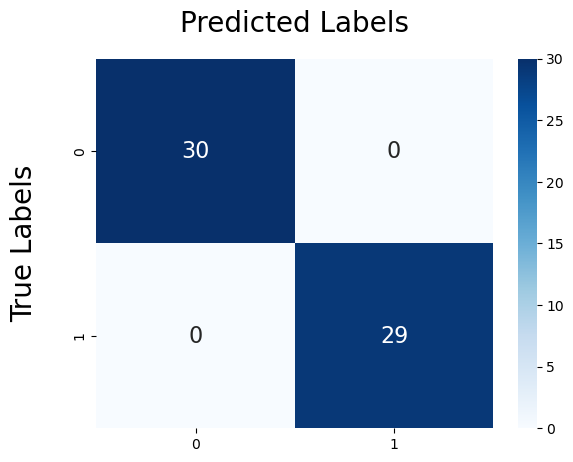

--------------------------------------------------------------------------------


In [33]:
RFC.fit(X_smote_train_scaled,y_smote_train)
y_pred_RFC_smote = RFC.predict(X_smote_test_scaled)
print('-'*80)
print("Random Forest Classifier :")
print("-"*16)
Evaluate_Performance(RFC, X_smote_train_scaled, X_smote_test_scaled, y_smote_train, y_smote_test)

<p style = "font-family:Book Antiqua;font-size:180%"> [5] Key- Nearest Neighbor :<p>

--------------------------------------------------------------------------------
Key- Nearest Neighbor :
----------------

 • Training Accuracy Score :  100.0
 • Cross Validation Score : 96.2
 ❖ Testing Accuracy Score :  98.31
 • Precision Score is : 100.0
 • Recall Score is : 96.55
 • F1-Score Score is : 98.25
--------------------------------------------------------------------------------


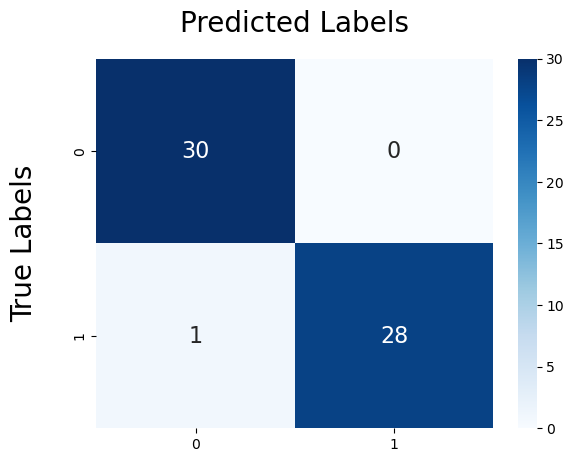

--------------------------------------------------------------------------------


In [34]:
KNN = KNeighborsClassifier( n_neighbors = 1 ) 
KNN.fit(X_smote_train_scaled,y_smote_train)
y_pred_KNN_smote = KNN.predict(X_smote_test_scaled)
print('-'*80)
print("Key- Nearest Neighbor :")
print("-"*16)
Evaluate_Performance(KNN, X_smote_train_scaled, X_smote_test_scaled, y_smote_train, y_smote_test)

In [35]:
results = [
    {'Model': 'Logistic Regression', 'Precision': precision_score(y_smote_test, y_pred_LR_smote) , 'Recall': recall_score(y_smote_test, y_pred_LR_smote) ,
     'F1-Score': f1_score(y_smote_test, y_pred_LR_smote) ,'Training Accuracy': LR.score(X_smote_train_scaled, y_smote_train), 'Test Accuracy': accuracy_score(y_smote_test, y_pred_LR_smote)},
    
    {'Model': 'Support Vector Machine(rbf)', 'Precision': precision_score(y_smote_test, y_pred_SVM_smote), 'Recall': recall_score(y_smote_test, y_pred_SVM_smote),
     'F1-Score': f1_score(y_smote_test, y_pred_SVM_smote),'Training Accuracy': SVM.score(X_smote_train_scaled, y_smote_train), 'Test Accuracy': accuracy_score(y_smote_test, y_pred_SVM_smote)},
    
    {'Model': 'Decision Tree', 'Precision': precision_score(y_smote_test, y_pred_DTC_smote), 'Recall': recall_score(y_smote_test, y_pred_DTC_smote),
     'F1-Score': f1_score(y_smote_test, y_pred_DTC_smote),'Training Accuracy': DTC.score(X_smote_train_scaled, y_smote_train), 'Test Accuracy': accuracy_score(y_smote_test, y_pred_DTC_smote)},
    
    {'Model': 'Random Forest', 'Precision': precision_score(y_smote_test, y_pred_RFC_smote), 'Recall': recall_score(y_smote_test, y_pred_RFC_smote),
     'F1-Score': f1_score(y_smote_test, y_pred_RFC_smote),'Training Accuracy': RFC.score(X_smote_train_scaled, y_smote_train), 'Test Accuracy': accuracy_score(y_smote_test, y_pred_RFC_smote)},
    
    {'Model': 'K-Nearest Neighbor', 'Precision': precision_score(y_smote_test, y_pred_KNN_smote), 'Recall': recall_score(y_smote_test, y_pred_KNN_smote),
     'F1-Score': f1_score(y_smote_test, y_pred_KNN_smote),'Training Accuracy': KNN.score(X_smote_train_scaled, y_smote_train), 'Test Accuracy': accuracy_score(y_smote_test, y_pred_KNN_smote)},
]
smote_results = pd.DataFrame(results).style.set_properties(**{'font-weight': 'bold'}, subset=pd.IndexSlice[[4], :])
print("Results after balancing the dataset using SMOTE Over Sampler technique : ")
print('-'*70)
smote_results

Results after balancing the dataset using SMOTE Over Sampler technique : 
----------------------------------------------------------------------


,Model,Precision,Recall,F1-Score,Training Accuracy,Test Accuracy
0,Logistic Regression,0.857143,0.827586,0.842105,0.800000,0.847458
1,Support Vector Machine(rbf),0.892857,0.862069,0.877193,0.834043,0.881356
2,Decision Tree,1.000000,0.965517,0.982456,1.000000,0.983051
3,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000
4,K-Nearest Neighbor,1.000000,0.965517,0.982456,1.000000,0.983051


<p style = "font-family:Book Antiqua;font-size:120%">✲ Applying the SMOTE technique to balance the class distribution in our dataset, and found that this approach improved the performance of our machine learning models. Specifically, the SMOTE technique helped to reduce the bias towards the majority class and improve the accuracy of the minority class predictions, resulting in a more balanced and accurate model overall.<p>
    
<p style = "font-family:Book Antiqua;font-size:120%">✲ While achieving 100% accuracy on both the training and testing sets may seem like an ideal scenario, it is not always the best indicator of model performance. In fact, achieving perfect accuracy on both sets can sometimes be a sign of overfitting, where the model has simply memorized the training data and may not generalize well to new, unseen data.
In contrast, a model with high accuracy on the training set but slightly lower accuracy on the testing set may indicate better generalization to new data. This is because the model has learned to identify patterns in the training data that are also present in the testing data, rather than simply memorizing the training set.<p>
        
<p style = "font-family:Book Antiqua;font-size:120%"><b>✲ Based on our analysis and evaluation, we recommend using the Key- Nearest Neighbor model over the other models for this particular problem</b> <p>    